# Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

    1.Read the column description and ensure you understand each attribute well
    2.Study the data distribution in each attribute, share your findings. (5 points)
    3.Get the target column distribution. Your comments
    4.Split the data into training and test set in the ratio of 70:30 respectively
    5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
    6.Print the confusion matrix for all the above models (5 points)
    7.Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [199]:
#Importing necessary libraries
%matplotlib inline 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Reading the file "Bank_Personal_Loan_Modelling-1.csv"

bank_df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [3]:
# Checking the number of rows and columns
bank_df.shape

(5000, 14)

In [4]:
# Checking a slice of the data to understand what the dataframe consists of
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Checking if any missing values
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Checking the 5 point summary for each column
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### From the 5 point summary of each attribute we can understand the following;
    1.Age and Experience are almost normally distributed as both mean and median values are nearly equal.
    2.There are negative values in Experience which is not possible and due to error. Need to replace negative values
    3.Income, CCAvg and Mortgage are having slightly right skewed distribution since the mean is greater than their median.
    4.Family and Education are ordinal categorical variables.Family varies from 1-4 where the numbers suggest the size of the family while Education varies from 1-3 where 1 = Undergrad, 2= Graduate and 3 = Advanced Professional.
    5.Personal Loan, Securities Account, CD Account, Online and CreditCard are all binary variables.
    6.For all the binary and ordinal categorical variables, we need to explore their distrubution individually to draw insights out of each.

# Conducting Univariate analysis of each of the nominal variables

## Family

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


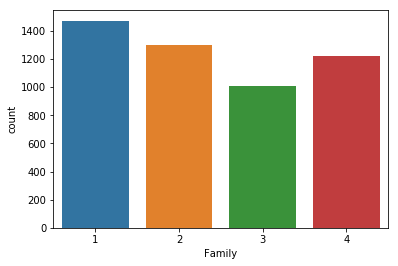

In [7]:
sns.countplot(x='Family',data=bank_df)
print(bank_df['Family'].value_counts())

#### There is roughly an equal distribution of customers across different family sizes

## Education

1    2096
3    1501
2    1403
Name: Education, dtype: int64


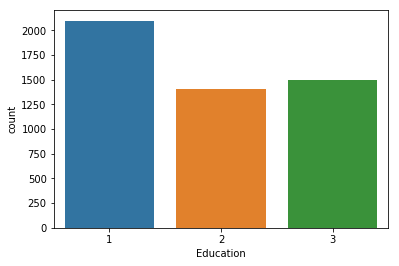

In [8]:
sns.countplot(x='Education',data=bank_df)
print(bank_df['Education'].value_counts())

#### Undergrads roughly constitute 41% of all the customers of the bank. Hence there is an opportunity to promote loans for higher education

## Securities Account

0    4478
1     522
Name: Securities Account, dtype: int64


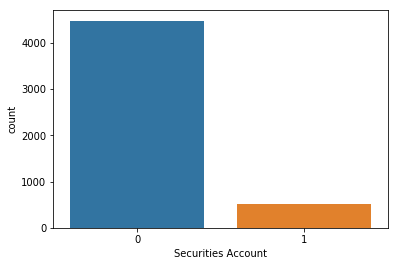

In [9]:
sns.countplot(x='Securities Account',data=bank_df)
print(bank_df['Securities Account'].value_counts())

#### 10.4% of customers have a securities account with the bank

## CD Account

0    4698
1     302
Name: CD Account, dtype: int64


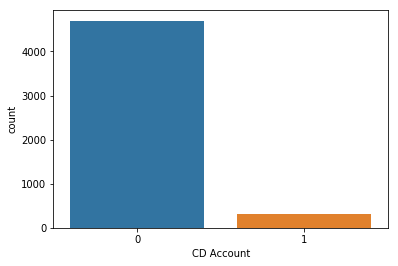

In [10]:
sns.countplot(x='CD Account',data=bank_df)
print(bank_df['CD Account'].value_counts())

#### Only 6% customers have a CD Account with the bank

## Online

1    2984
0    2016
Name: Online, dtype: int64


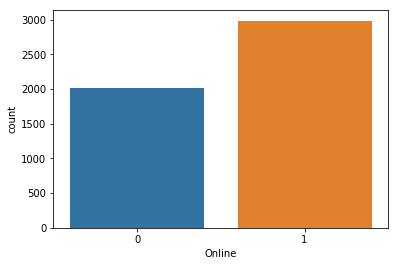

In [11]:
sns.countplot(x='Online',data=bank_df)
print(bank_df['Online'].value_counts())

#### Almost 60% of the bank's customers use internet banking facilities

## Credit Card

0    3530
1    1470
Name: CreditCard, dtype: int64


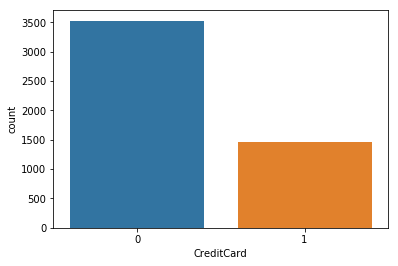

In [12]:
sns.countplot(x='CreditCard',data=bank_df)
print(bank_df['CreditCard'].value_counts())

#### Nearly 30% of the bank's customers use credit cards

## Personal Loan (Target Variable)

0    4520
1     480
Name: Personal Loan, dtype: int64


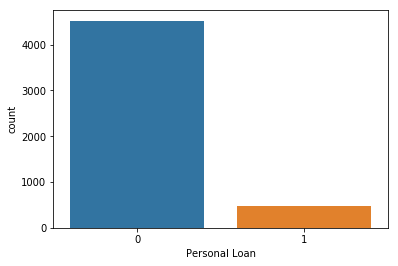

In [13]:
sns.countplot(x='Personal Loan',data=bank_df)
print(bank_df['Personal Loan'].value_counts())

#### Only 9.6% of all the customers avail bank loan so there is a good potential for converting bank customers who haven't availed any loan yet

## Conducting Univariate analysis of each of the numerical variables

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


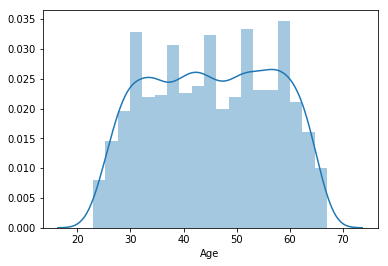

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


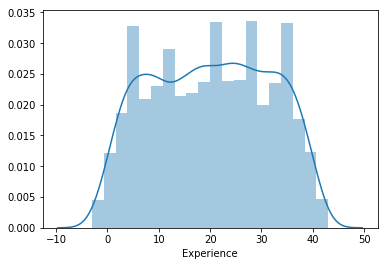

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


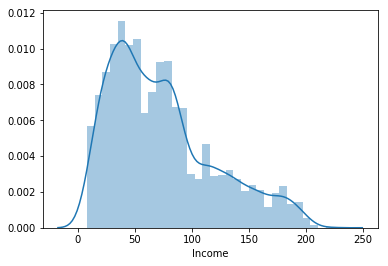

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


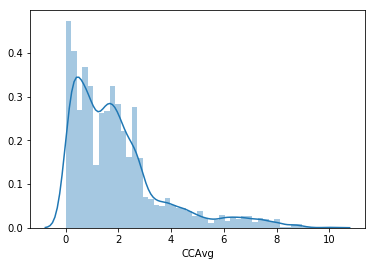

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


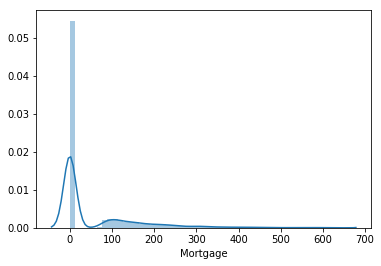

In [14]:
sns.distplot(bank_df['Age']) # plot 1
plt.show()
sns.distplot(bank_df['Experience']) # plot 2
plt.show()
sns.distplot(bank_df['Income']) # plot 3
plt.show()
sns.distplot(bank_df['CCAvg']) # plot 4
plt.show()
sns.distplot(bank_df['Mortgage']) # plot 5
plt.show()

    #### Age and Experience are normally distributed
    #### Income, CCAvg and Mortgage are having slightly right skewed distribution

## Checking the correlations

In [15]:
corr = bank_df.corr()

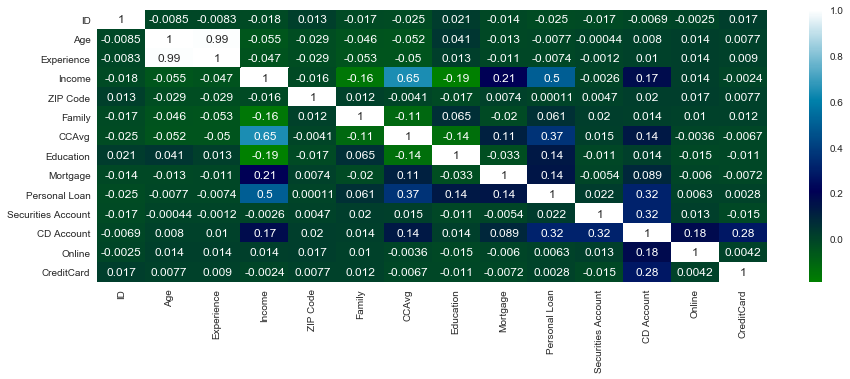

In [16]:
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(corr, annot = True,cmap="ocean")

#### Insights :
    1. Age and Experience is almost having a perfect correlation between each other.
    2.ID and ZIP Code has no correlation with the target variable. Also they make no sense to be added in the list of attributes responsible for a change in the target variable. So it is better to drop them from the list of attributes to avoid overfitting.
    3.Income has the highest correlation with Personal loan suggesting it can be good predictor for the target variable
    4.Income has a moderately strong correlation with CCAvg.

#### Showing the linear realtionship between age and experience using a pairplot

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


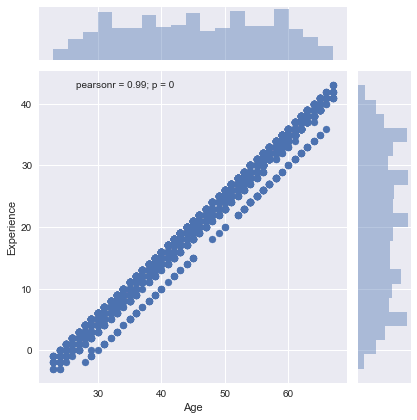

In [17]:
sns.jointplot(bank_df['Age'], bank_df['Experience'])

#### From the above visual representation we can infer there is linear relationship between Age and Experience and the negative values in Experience are probably the correct values with an incorrect sign.

In [18]:
# Compare the Age, Exp and Education for a person
pd.DataFrame(bank_df[bank_df["Experience"]>0][["Age","Education","Experience"]].sort_values("Age")).head()

,Age,Education,Experience
0,25,1,1
2836,25,1,1
2226,25,1,1
2192,25,1,1
3010,25,1,1


#### Assuming that the dataset values for Experience is correct but were captured with an incorrect sign, we are replacing the values with absolute values

In [19]:
bank_df["Experience"] = bank_df["Experience"].apply(abs)

In [20]:
# Checking if all the negative values have been changed
bank_df[bank_df['Experience'] < 0]['Experience'].count()

0

#### Dropping ID and ZIP Code from the original bank_df dataframe and storing it as bank_df_mod

In [21]:
bank_df_mod = bank_df.drop(columns= ["ID","ZIP Code"])

#### Creating the X(Feature-set) and y(Target-set)

In [22]:
X= bank_df_mod.drop(columns="Personal Loan")

In [23]:
y= bank_df_mod['Personal Loan']

#### Normalizing X to get values from 0 to 1

In [24]:
mm_scaler = preprocessing.MinMaxScaler()

In [25]:
X_minmax = mm_scaler.fit_transform(X)

In [26]:
X_minmax_df = pd.DataFrame(X_minmax)

In [27]:
X_minmax_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.045455,0.023256,0.189815,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.441860,0.120370,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.348837,0.013889,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.209302,0.425926,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.186047,0.171296,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


#### Splitting the data into training set and test set with a ratio of 70:30

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax_df, y, test_size=0.3, random_state=100)

# Building the KNN model using the train dataset and predicting the Personal Loan column on the test dataset

In [206]:
KNN = KNeighborsClassifier(n_neighbors=3, weights = 'distance', metric='euclidean')

In [207]:
# Calling Nearest Neighbour algorithm
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [208]:
# Predicting on test dataset
predicted_labels = pd.DataFrame(KNN.predict(X_test))

In [209]:
# Evaluating the performance of prediction on train and test data
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

In [210]:
# getting the accuracy scores
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

In [211]:
print("train accuracy is ", accuracy_score_train)
print("test accuracy is ", accuracy_score_test)

train accuracy is  1.0
test accuracy is  0.9566666666666667


In [212]:
actual = y_test
predicted = KNN.predict(X_test)

In [213]:
print(metrics.classification_report(actual, predicted))
print(metrics.confusion_matrix(actual, predicted))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1342
          1       0.91      0.65      0.76       158

avg / total       0.96      0.96      0.95      1500

[[1332   10]
 [  55  103]]


# Building the Logistic Regression model using the train dataset and predicting the Personal Loan column on the test dataset

In [224]:
# Calling the logistic regression algorithm and training the algorithm by passing it trhough the train data
log = LogisticRegression()
log.fit(X_train, y_train)
model_score = model.score(X_test, y_test)

In [222]:
# Evaluating the performance of prediction on train and test data
y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)

In [218]:
# getting the accuracy scores
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

In [219]:
print("train accuracy is ", accuracy_score_train)
print("test accuracy is ", accuracy_score_test)

train accuracy is  0.9511428571428572
test accuracy is  0.9433333333333334


In [220]:
actual = y_test
predicted = log.predict(X_test)

In [221]:
print(metrics.classification_report(actual, predicted))
print(metrics.confusion_matrix(actual, predicted))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1342
          1       0.88      0.54      0.67       158

avg / total       0.94      0.94      0.94      1500

[[1330   12]
 [  73   85]]


# Building the Naive Bayes model using the train dataset and predicting the Personal Loan column on the test dataset

In [193]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [194]:
actual = y_test
predicted = NB.predict(X_test)

In [195]:
print(metrics.classification_report(actual, predicted))
print(metrics.confusion_matrix(actual, predicted))

             precision    recall  f1-score   support

          0       0.95      0.92      0.93      1342
          1       0.46      0.60      0.52       158

avg / total       0.90      0.88      0.89      1500

[[1230  112]
 [  63   95]]


In [197]:
NB.score(X_test, y_test)

0.8833333333333333

# Building the Random Forest model using the train dataset and predicting the Personal Loan column on the test dataset

In [242]:
rfcl = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=30, min_samples_leaf=15, n_estimators=45)
rfcl = rfcl.fit(X_train, y_train)

In [243]:
y_pred_train_rfcl = rfcl.predict(X_train)
y_pred_test_rfcl = rfcl.predict(X_test)

In [244]:
metrics.confusion_matrix(y_test, y_pred_test_rfcl)

array([[1338,    4],
       [  33,  125]], dtype=int64)

In [245]:
print (metrics.classification_report(y_test,y_pred_test_rfcl))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1342
          1       0.97      0.79      0.87       158

avg / total       0.98      0.98      0.97      1500



# We've been asked to apply KNN, Log reg and Naive Bayes model on the dataset. Upon application of these 3 models, we can see that the KNN algorithm is yielding the best result in terms of precision and recall for different categories of the Personal Loan column.

    Precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    Recall is intuitively the ability of the classifier to find all the positive samples.
    
# Our objective in this exercise is to correctly classify the customers of the bank who will be willing to take up the loan and similarly classify those who will be uninterested. Hence both precision and recall has to be high for thr model to perform as per the business objective.

# KNN has a better precision and recall as compared to Log Reg or a Naive Bayes model and hence KNN algorithm is performing better as compared to the other 2 algorithms.

# Why KNN is performing better than Log reg or Naive Bayes?

### KNN is non-parametric where as Log reg and Naive bayes are both parametric algorithms. If the attributes are not selected properly, the result from a Log reg or a Naive bayes model get affected. Since we have selected all the variables available without dropping the ones which are highly correlated, the prediction from a Log reg or a Naive Bayes model is comparatively worse than that from a KNN.


***********************************************************************************************************************

        I have additionally applied a Random forest on the dataset. The random forest model yields the best output as compared to KNN, Log Reg or a Naive Bayes. Random Forest takes the avg of the multiple iterations it runs in the background, to minimise the prediction error. Also random forest has the best trade off between Bias and Variance. Hence both precision and recall are high.
